# Final Project Submission - Module 1

<br> David Mauger
<br> Data Science - Full Time Immersive
<br> Oct 4, 2019
<br> Howard Smith & Amanda Yandow
<br> https://github.com/Maugy

# Project: House Prices in Kings County, WA

## Overview
1. [Objective & Background](#001)
2. [Obtaining Data](#002)
3. [Scrubbing Data](#003)
4. [Exploring Data](#004)
5. [Modeling Data](#005)
6. [Interpreting Data](#006)


<a id="001"></a>

## 1) Objective & Background
***
Clean, explore, and model the dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.

**1.1 Questions to Answer:**
> 1) Does location affect the sale price of houses in Kings County?
<br> 2) Does time of year affect the sale price of houses in Kings County?
<br> 3) What feature(s) most significantly affect the sale prices of houses in Kings County?
<br>

**1.2 Data Provided:** 
>**Column Names and Descriptions for Kings County Data Set**
* **id** - unique identified for a house
* **dateDate** - house was sold DM-date/time
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

**1.3 Methodology**
> OSEMN Process
>    - Obtain Data
>    - Scrub Data
>    - Explore Data
>    - Model Data
>    - Interpret Data

**1.4 Background Info**


<a id="002"></a>

## 2) Obtaining Data
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('husl')
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('kc_house_data-copy1.csv')

<a id="003"></a>

## 3)  Scrubbing Data
***


**3.1** - [Data Observations](#3.1) 
<br>**3.2** - [Categorical Data & Datatypes](#3.2) 
<br>**3.3** - [Null Values](#3.3) 
<br>**3.4** - [Feature Engineering](#3.4)
<br>**3.5** - [Multicollinearity](#3.5) 
<br>**3.6** - [Cleaned Dataset](#3.6)
<br>
<br>
<br>

<a id="3.1"></a>

### 3.1 - Data Observations

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
print('\n *Data Shape* \n', df.shape)
print('\n *Data Types* \n')
print(df.dtypes)



 *Data Shape* 
 (21597, 21)

 *Data Types* 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [4]:
print('\n *Data Info* \n')
df.info()


 *Data Info* 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+

In [5]:
print('\n *Data Description* \n')
df.describe()


 *Data Description* 



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<a id="3.2"></a>

### 3.2 - Categorical Data & Datatypes

**Broad overview of value counts in each feature. Immediate observations include:**
> - sqft_basement contains '?' and '0.0' values. 
> - waterfront is likely categorical.
> - condition, grade, and view seem to reflect a scale with defined categories. 

In [6]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

In [7]:
print('\n *Value Counts - sqft_basement* \n')
print(df['sqft_basement'].value_counts().head(),'\n')
print('\n *Value Percentages - sqft_basement* \n')
print(df['sqft_basement'].value_counts(normalize=True).head())


 *Value Counts - sqft_basement* 

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64 


 *Value Percentages - sqft_basement* 

0.0      0.593879
?        0.021021
600.0    0.010048
500.0    0.009677
700.0    0.009631
Name: sqft_basement, dtype: float64


<br> **Modify Datatypes & Replace Values**

In [8]:
print('\n *Replace & Change Datatype* \n')
df.sqft_basement.replace(['?'], '0', inplace=True)
df.sqft_basement = df.sqft_basement.astype('float').astype('int')
df.sqft_basement.value_counts().head()


 *Replace & Change Datatype* 



0      13280
600      217
500      209
700      208
800      201
Name: sqft_basement, dtype: int64

In [9]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [10]:
df.waterfront = df.waterfront.astype('str')
df.condition = df.condition.astype('str')
df.grade = df.grade.astype('str')

print(df.waterfront.unique())
print(df.condition.unique())
print(df.grade.unique())

['nan' '0.0' '1.0']
['3' '5' '4' '1' '2']
['7' '6' '8' '11' '9' '5' '10' '12' '4' '3' '13']


In [11]:
df.price = df.price.astype('int')
#change price to integer?

In [12]:
print(df.floors.head())
print(df.bathrooms.head())
# leave as floats.

0    1.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: floors, dtype: float64
0    1.00
1    2.25
2    1.00
3    3.00
4    2.00
Name: bathrooms, dtype: float64


In [13]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y") 
df_date_graph = df['date'].groupby([df.date.dt.month]).agg('count')
df_date_graph

date
1      978
2     1247
3     1875
4     2229
5     2414
6     2178
7     2211
8     1939
9     1771
10    1876
11    1409
12    1470
Name: date, dtype: int64

<a id="3.3"></a>

### 3.3 - Null Values, Duplicates, & Outliers

**EXAMINE DUPLICATES**

In [14]:
print('\n *Duplicates* \n')
duplicates = df[df.duplicated()]
print(len(duplicates))
print(duplicates)
#no duplicates?


 *Duplicates* 

0
Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


In [15]:
df['id'].value_counts().head()
# Likely houses that were resold or re-inspected. 
# They should not skew the data since a new grade would affect the price accordingly.

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64

**EXAMINE OUTLIERS**


 *Bathrooms & Bedrooms* 



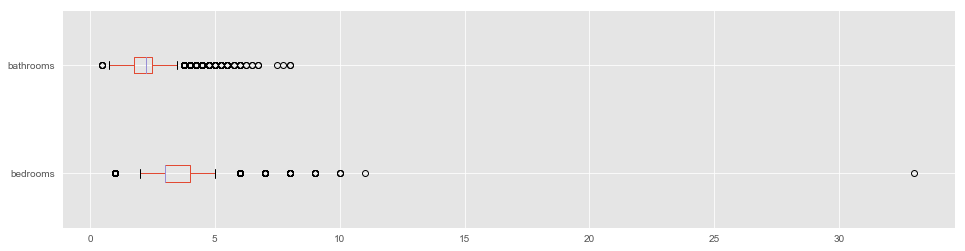

In [16]:
print('\n *Bathrooms & Bedrooms* \n')
df[['bedrooms', 'bathrooms']].plot(kind='box', vert=False, figsize=(16,4));


 *Sqft - Living, Above, Living15* 



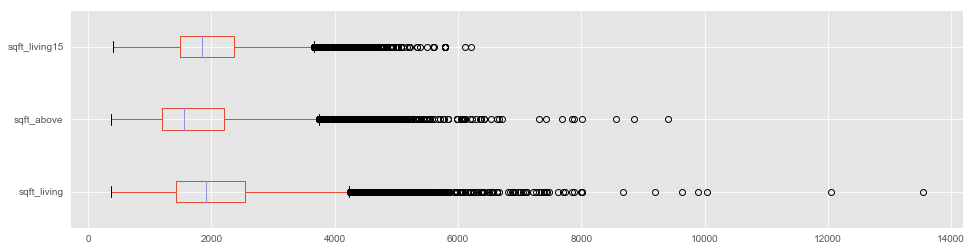

In [17]:
print('\n *Sqft - Living, Above, Living15* \n')
df[['sqft_living', 'sqft_above', 'sqft_living15']].plot(kind='box', vert=False, figsize=(16,4));


 *Sqft - Lot & Lot15* 



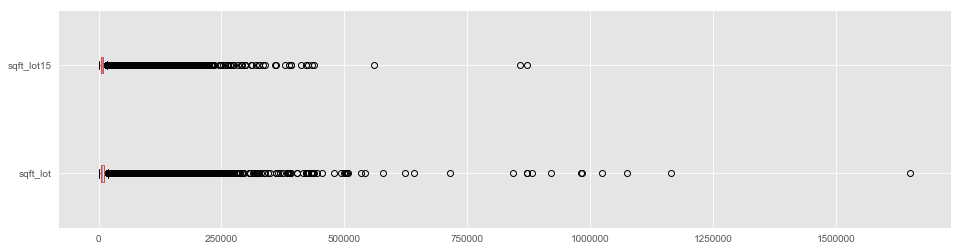

In [18]:
print('\n *Sqft - Lot & Lot15* \n')
df[['sqft_lot', 'sqft_lot15']].plot(kind='box', vert=False, figsize=(16,4));

**DEAL WITH NULL VALUES**

In [19]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [20]:
print('\n View - Unique Values:')
print(df.view.unique()) 
print('\n View - Value Counts:')
print(df.view.value_counts())
print('\n View - Total NaN Values:')
print(df.view.isna().sum())


 View - Unique Values:
[ 0. nan  3.  4.  2.  1.]

 View - Value Counts:
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

 View - Total NaN Values:
63


In [21]:
print('\n Replace NaN with "0":')
df.view.fillna(0, inplace=True)
print(df.view.unique())
print('\n Type Change:')
df.view = df.view.astype('int64')
print(df.view.value_counts())


 Replace NaN with "0":
[0. 3. 4. 2. 1.]

 Type Change:
0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64


In [22]:
print('\n Yr_Renovated:')
print(df.yr_renovated.value_counts().head(20))
print(df.yr_renovated.value_counts(normalize=True).head())
print(df.yr_renovated.isna().sum())



 Yr_Renovated:
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
Name: yr_renovated, dtype: int64
0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
Name: yr_renovated, dtype: float64
3842


In [23]:
# Categorize yr_renovated

cat = ['no_reno', 'before 1970', '1970-1979', '1980-1989', '1990-1999', '2000-2010', 'after 2010']
bins = [0., 1950., 1970., 1980., 1990., 2000., 2010., 2019.]
df['reno_year'] = pd.cut(df['yr_renovated'], bins, labels=cat, right=False)
df.reno_year.fillna('no_reno', inplace=True)

print('\n Yr_Renovated Bins:')
print(df.reno_year.unique())
print(df.reno_year.value_counts())


 Yr_Renovated Bins:
[no_reno, 1990-1999, 2000-2010, after 2010, 1970-1979, 1980-1989, before 1970]
Categories (7, object): [no_reno < before 1970 < 1970-1979 < 1980-1989 < 1990-1999 < 2000-2010 < after 2010]
no_reno        20862
2000-2010        229
after 2010       150
1990-1999        143
1980-1989        124
before 1970       47
1970-1979         42
Name: reno_year, dtype: int64


In [24]:
df.reno_year.isna().sum()

0

In [25]:
reno_year = df['reno_year']
type(reno_year)



pandas.core.series.Series

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null int64
condition        21597 non-null object
grade            21597 non-null object
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
reno_year        21597 non-null category
dtypes: category(1), datetime6

<a id="3.4"></a>

### 3.4 - Feature Engineering

> Separate exploration of 'Time of Year' & 'Location'.
<br>Drop date from primary dataframe to deal with in separate dataframe.
<br>Drop zipcode, lat, long to deal with in another dataframe.

**TIME OF YEAR AND PRICE**

In [27]:
df_date_graph = df['date'].groupby([df.date.dt.month]).agg('count')
df_date_graph

date
1      978
2     1247
3     1875
4     2229
5     2414
6     2178
7     2211
8     1939
9     1771
10    1876
11    1409
12    1470
Name: date, dtype: int64

In [28]:
import calendar
import datetime
 
month_num = 1
month_abre = datetime.date(2015, month_num, 1).strftime('%b')

calendar_list = [calendar.month_abbr[month_val] for month_val in range(1, 13)]

calendar_list

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

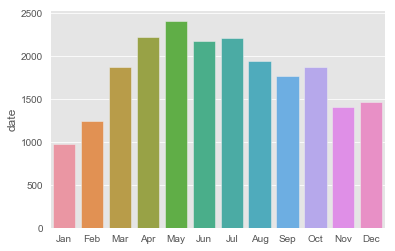

In [29]:
sns.barplot(x=calendar_list, y=df_date_graph);

**LOCATION AND PRICE**

In [30]:
df_location = df[['price','zipcode','lat','long']]
df_location.head()

,price,zipcode,lat,long
0,221900,98178,47.5112,-122.257
1,538000,98125,47.7210,-122.319
2,180000,98028,47.7379,-122.233
3,604000,98136,47.5208,-122.393
4,510000,98074,47.6168,-122.045


<a id="Map"></a>

In [31]:
import chart_studio.plotly 
import plotly.graph_objects as go
import plotly
import pandas as pd

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)     

mapbox_access_token = 'pk.eyJ1IjoiZG1hdWdlciIsImEiOiJjazE4OXhuYmgxZ3d2M21uaXV5eWt6Nm5iIn0.8mXDhVPh7XaS9VSr1Uj7cw'
chart_studio.tools.set_credentials_file(username='dmauger', api_key='AikWpcnd27N8lxreryv3')

home_lat = df_location['lat']
home_lon = df_location['long']

data = [go.Scattermapbox(lat = home_lat, lon = home_lon,
                         mode = 'markers',
                         marker = dict(size = 2.55, opacity = 0.5, 
                                       color = df['price'],
                                       colorbar = dict(title = 'Price (million)'),
                                       colorscale = [[0, "rgb(166,206,227)"],
                [0.10, "rgb(31,120,180)"],
                [0.15, "rgb(251,154,153)"],
                [0.20, "rgb(227,26,28)"],
                [0.50, "rgb(178,223,138)"],
                [1, "rgb(51,160,44)"]]),
                         text = df['price'])]
                      
layout = go.Layout(title = 'Home Prices in King County, WA',
                   autosize = True,
                   hovermode = 'closest',
                   showlegend = False,
                   mapbox = dict(accesstoken = mapbox_access_token,
                                 bearing = 0,
                                 center = dict(lat = 47.61, lon = -122.2),
                                 pitch = 0,
                                 zoom = 9.5,
                                 style = 'light'))

fig = dict(data = data, layout = layout)
iplot(fig)

### 3.5 - Multicollinearity

In [32]:
print('\n Correlation between Variables:')
df_pred = df.iloc[:,3:]
df_pred.corr()


 Correlation between Variables:


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,0.078354,0.479386,0.297229,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.186016,0.686668,0.278485,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.281715,0.876448,0.428660,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.075054,0.184139,0.015031,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.028414,0.523989,-0.241866,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
view,0.078354,0.186016,0.281715,0.075054,0.028414,1.000000,0.166017,0.270629,-0.054452,0.100977,0.085059,0.006321,-0.077702,0.278928,0.073083
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.166017,1.000000,-0.051175,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
sqft_basement,0.297229,0.278485,0.428660,0.015031,-0.241866,0.270629,-0.051175,1.000000,-0.130085,0.071190,0.073271,0.109853,-0.142369,0.199288,0.015885
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.054452,0.424037,-0.130085,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.018495,0.051050,0.055660,0.004513,0.003535,0.100977,0.022137,0.071190,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


In [33]:
print('\n Measure of High Correlation:')
abs(df_pred.corr()>0.75)


 Measure of High Correlation:


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False



 Heatmap of Correlation:


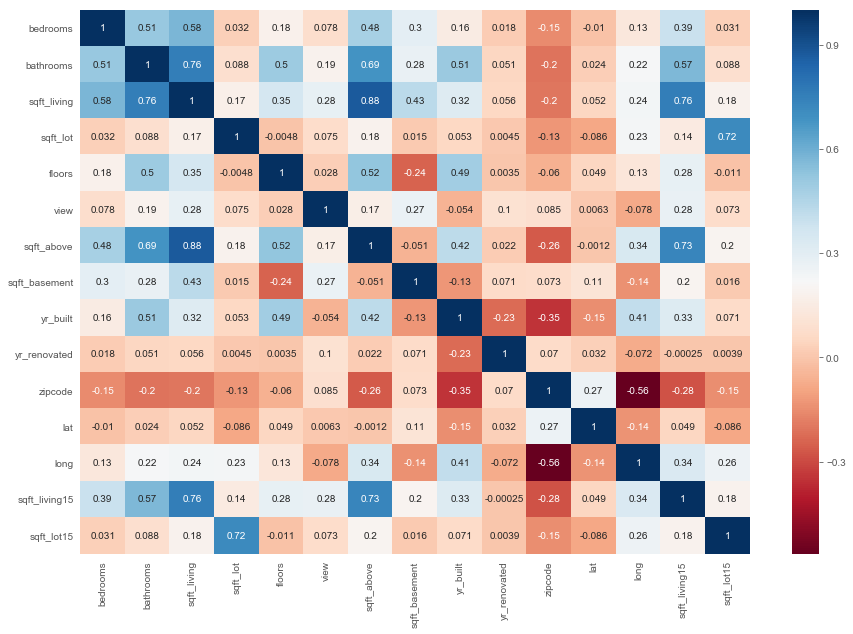

In [34]:
print('\n Heatmap of Correlation:')
ax, fig = plt.subplots(figsize = (15, 10))
sns.heatmap(df_pred.corr(), annot=True, cmap='RdBu')
plt.show() 

In [35]:
df = df.drop(columns=['sqft_above', 'sqft_living15'], axis=1)
# Drop highly-correlated variables; keep bathrooms for now because it seems meaningful in reality. 

df = df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long', 'yr_renovated', 'sqft_lot15'], axis=1)
# Can also drop columns that are separated into other datasets.

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,reno_year
0,221900,3,1.00,1180,5650,1.0,nan,0,3,7,0,1955,no_reno
1,538000,3,2.25,2570,7242,2.0,0.0,0,3,7,400,1951,1990-1999
2,180000,2,1.00,770,10000,1.0,0.0,0,3,6,0,1933,no_reno
3,604000,4,3.00,1960,5000,1.0,0.0,0,5,7,910,1965,no_reno
4,510000,3,2.00,1680,8080,1.0,0.0,0,3,8,0,1987,no_reno


## 3.6 - Cleaned Dataset

In [36]:
print('\n Overview of Clean Dataset:')
df = round(df,2)
df.head()


 Overview of Clean Dataset:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,reno_year
0,221900,3,1.00,1180,5650,1.0,nan,0,3,7,0,1955,no_reno
1,538000,3,2.25,2570,7242,2.0,0.0,0,3,7,400,1951,1990-1999
2,180000,2,1.00,770,10000,1.0,0.0,0,3,6,0,1933,no_reno
3,604000,4,3.00,1960,5000,1.0,0.0,0,5,7,910,1965,no_reno
4,510000,3,2.00,1680,8080,1.0,0.0,0,3,8,0,1987,no_reno


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null int64
condition        21597 non-null object
grade            21597 non-null object
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
reno_year        21597 non-null category
dtypes: category(1), float64(2), int64(7), object(3)
memory usage: 2.0+ MB


## 4) Data Exploration & Plotting
***

### Overview of Patterns/Trends

In [38]:
col1 = ['floors', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'price']
col2 = ['condition', 'grade', 'sqft_basement', 'yr_built', 'reno_year', 'price']

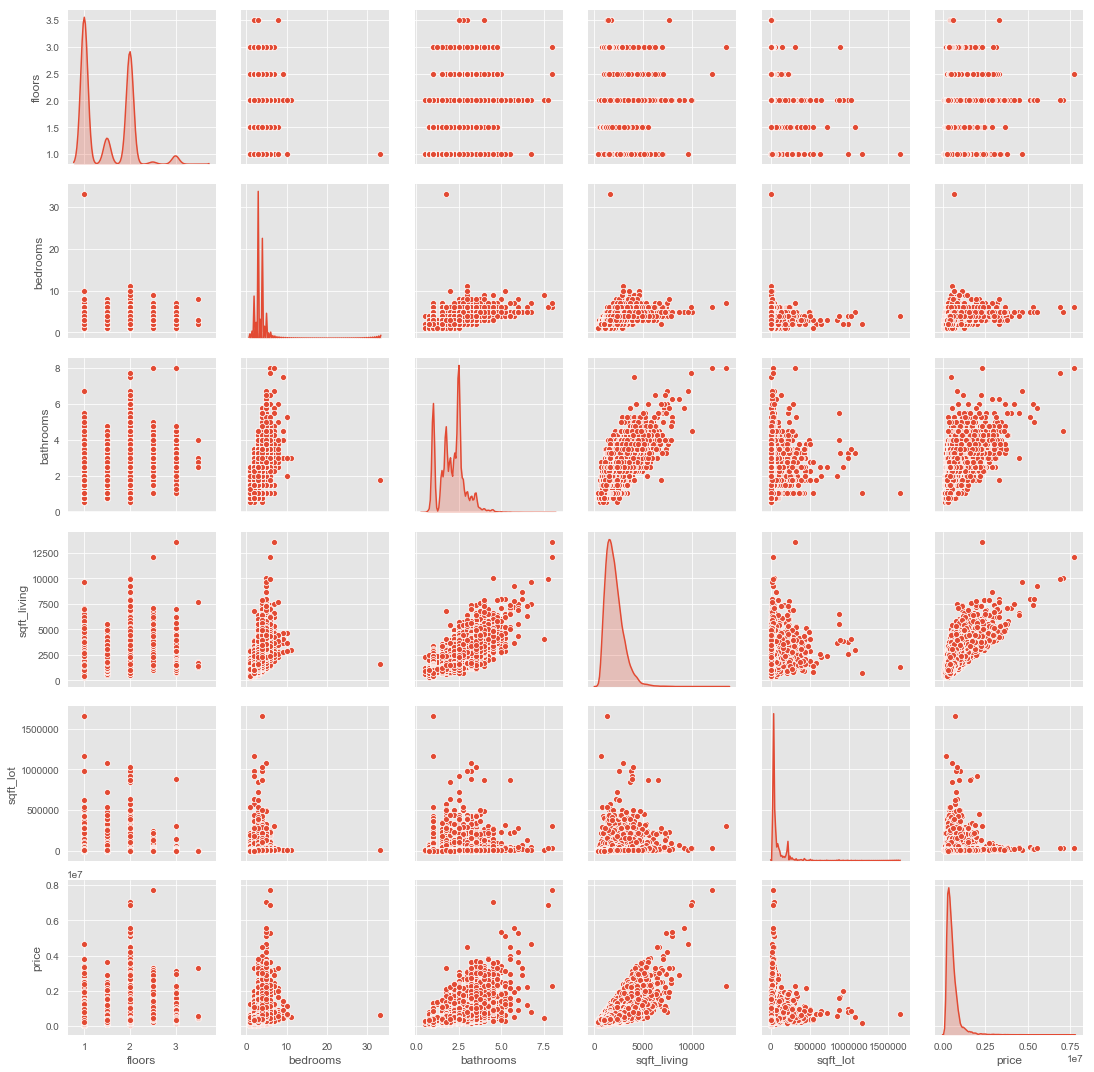

In [39]:
sns.pairplot(df[col1], diag_kind='kde');

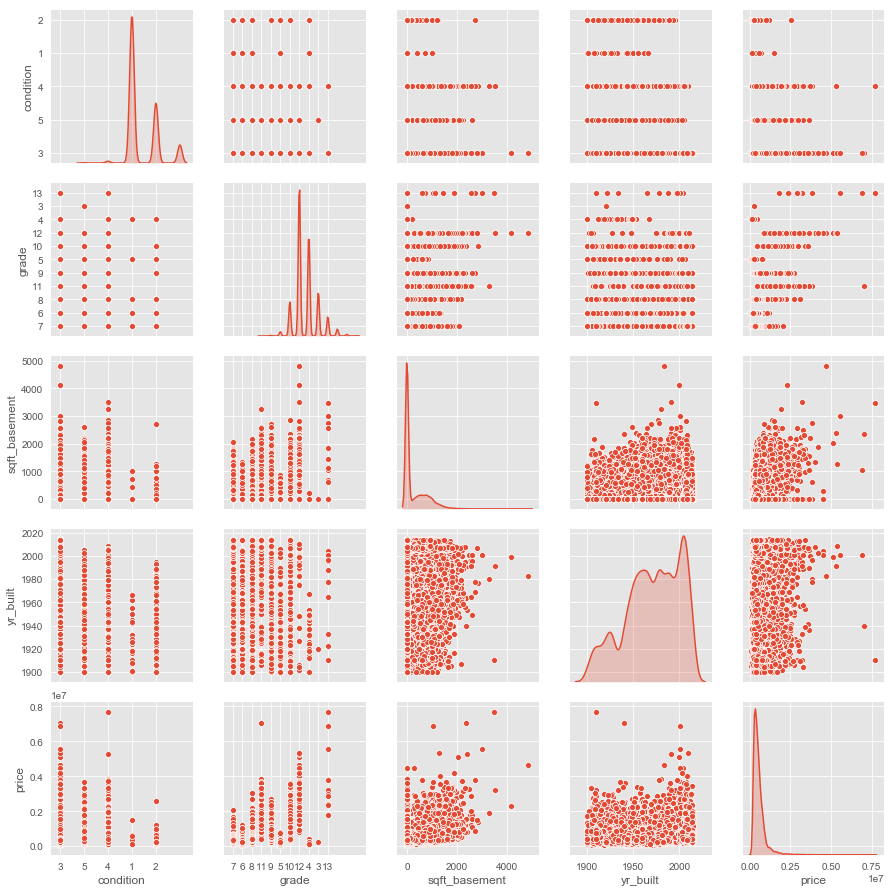

In [40]:
sns.pairplot(df[col2], diag_kind='kde');

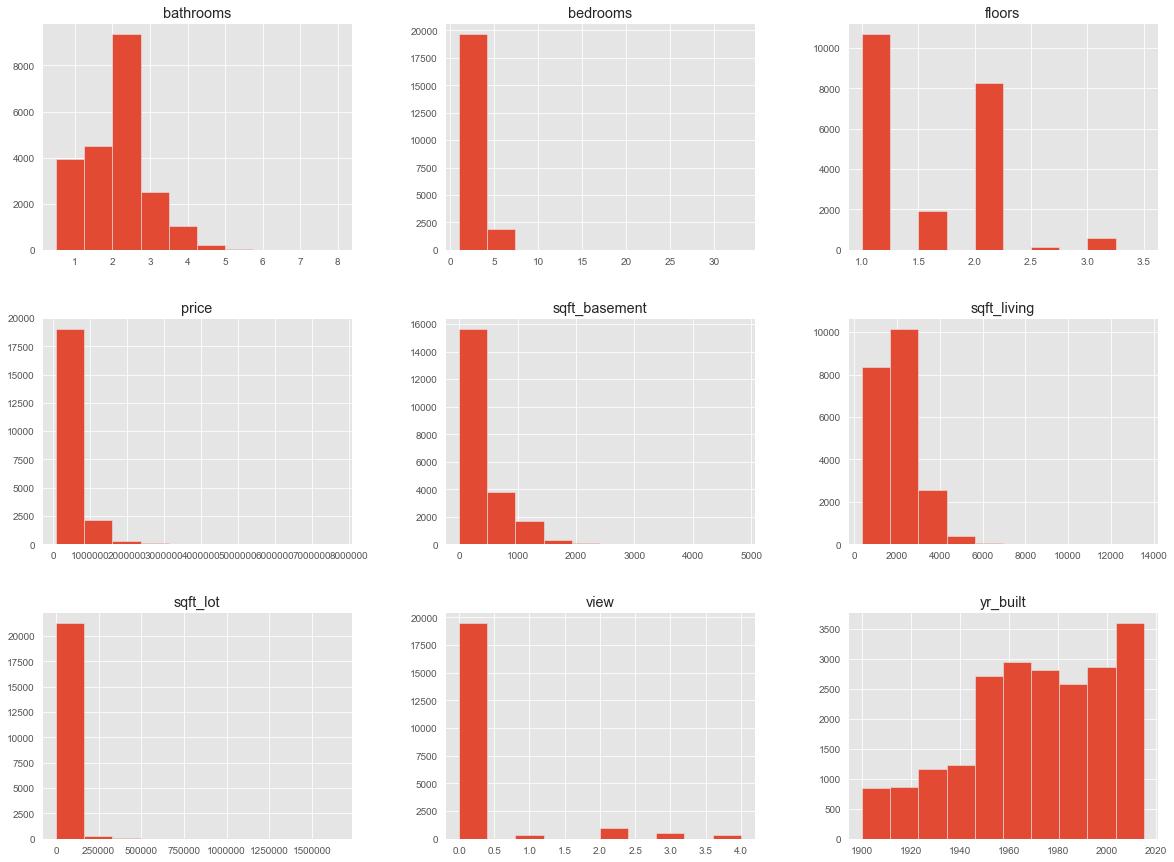

In [41]:
df.hist(figsize=(20,15)); 
# lacking normal distribution; need to standardize.

**Initial Observations**
- possible categorical data includes: condition, grade, floors.
- possible linear relationships with price: sqft_living, sqft_basement. 
- histograms do not show any normal distributions. 

### A Closer Look

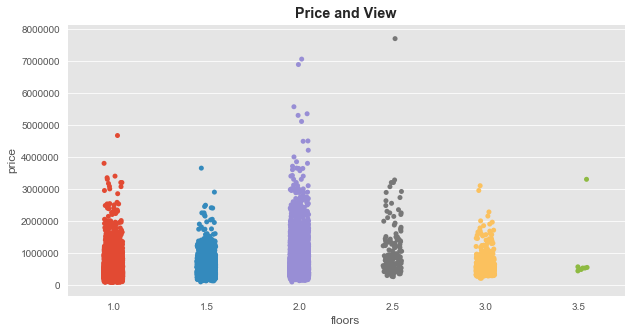

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
sns.stripplot(x='floors', y='price', data=df);
plt.title('Price and View', fontweight='bold')
plt.show()

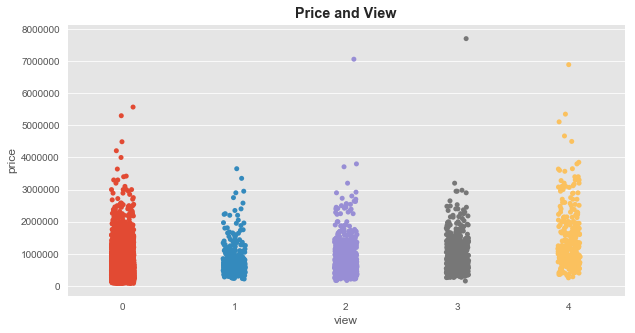

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
sns.stripplot(x='view', y='price', data=df);
plt.title('Price and View', fontweight='bold')
plt.show()

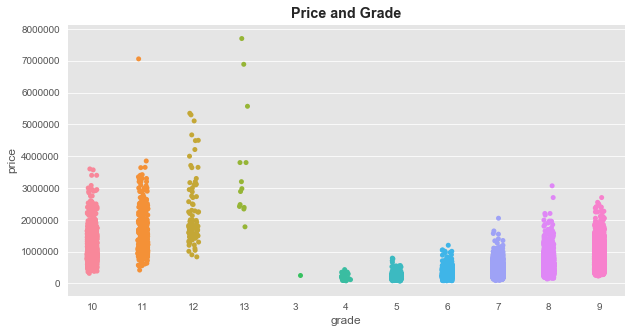

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
sns.stripplot(x='grade', y='price', data=df)
plt.title('Price and Grade', fontweight='bold')
plt.show()

In [45]:
df_grade_revised = df['grade'].astype('int64')
df_price_revised = df['price']

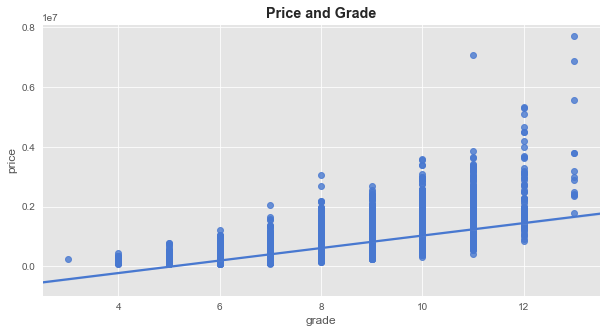

In [46]:
sns.set_palette('muted')
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x=df_grade_revised, y=df_price_revised)
plt.title('Price and Grade', fontweight='bold')
plt.show()

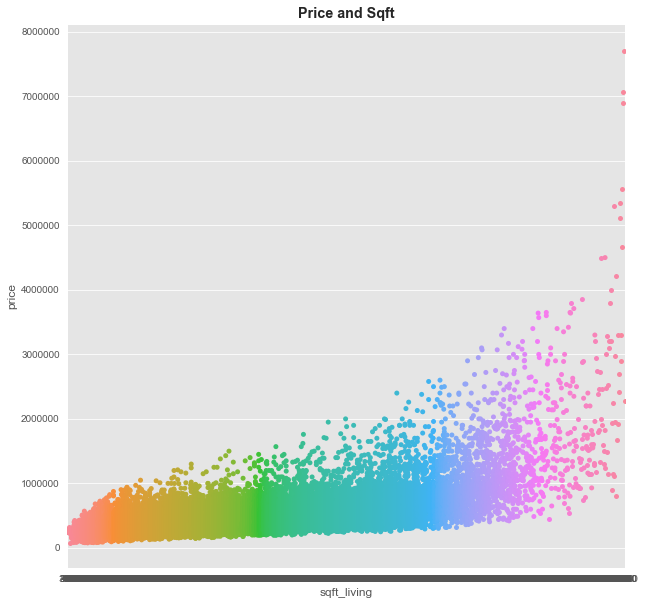

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
sns.stripplot(x='sqft_living', y='price', data=df)
plt.title('Price and Sqft', fontweight='bold')
plt.show()

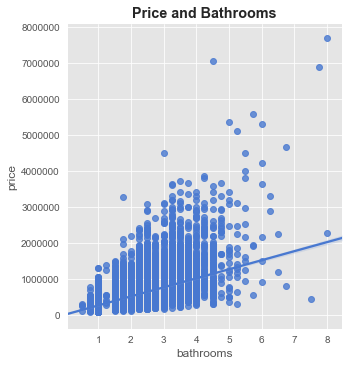

In [48]:
sns.lmplot(x='bathrooms', y='price', data=df);
plt.title('Price and Bathrooms', fontweight='bold')
plt.show()

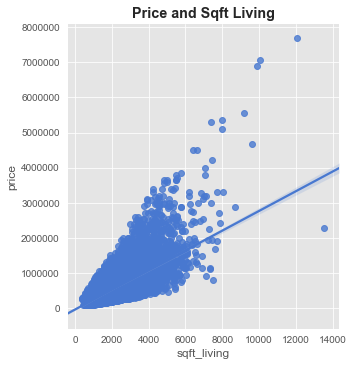

In [49]:
sns.lmplot(x="sqft_living", y="price", data=df);
plt.title('Price and Sqft Living', fontweight='bold')
plt.show()

<a id="005"></a>

## 5) Baseline Modeling
***

5.1 [Continuous Variables](#5.1)
<br>5.2 [Categorical Variables](#5.2)
<br>5.3 [Regression Models](#5.3)
<br>5.4 [Model Fit](#5.4)
<br>5.5 [Feature Selection](#5.5)
<br>5.6 [Train/Test](#5.6)
<br>5.7 [Model Validation](#5.7)

### 5.1 Continuous Variables

In [50]:
from statsmodels.formula.api import ols

In [51]:
outcome = 'price'
x_cols = ['sqft_living', 'sqft_basement', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'yr_built']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     3784.
Date:                Mon, 07 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:02:46   Log-Likelihood:            -2.9793e+05
No. Observations:               21597   AIC:                         5.959e+05
Df Residuals:                   21588   BIC:                         5.959e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.976e+06   1.34e+05     44.527      0.000    5.71e+06    6.24e+06
sqft_living     286.1034      3.140     91.128      0.000     279.950     292.257
sqft_basement   -35.2279      4.784     -7.363      0.000     -44.606     -25.850
bedrooms      -5.855e+04   2199.951    -26.616      0.000   -6.29e+04   -5.42e+04
bathrooms      6.423e+04   3788.442     16.953      0.000    5.68e+04    7.17e+04
sqft_lot         -0.3606      0.040     -8.996      0.000      -0.439      -0.282
floors         4.552e+04   4039.148     11.270      0.000    3.76e+04    5.34e+04
view           8.544e+04   2268.282     37.668      0.000     8.1e+04    8.99e+04
yr_built      -3065.2038     69.580    -44.053      0.000   -3201.586   -2928.822
==============================================================================
Omnibus:                    13969.472   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           551213.375
Skew:                           2.556   Prob(JB):                         0.00
Kurtosis:                      27.216   Cond. No.                     3.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
numbers_df = df[['sqft_living', 'sqft_lot', 'sqft_basement']]
numbers2_df = df[['bedrooms', 'bathrooms', 'floors', 'view', 'yr_built']]

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_numb = scaler.fit_transform(numbers_df)
scaled_numbers_df = pd.DataFrame(norm_numb, columns=['sqft_living', 'sqft_lot', 'sqft_basement'])

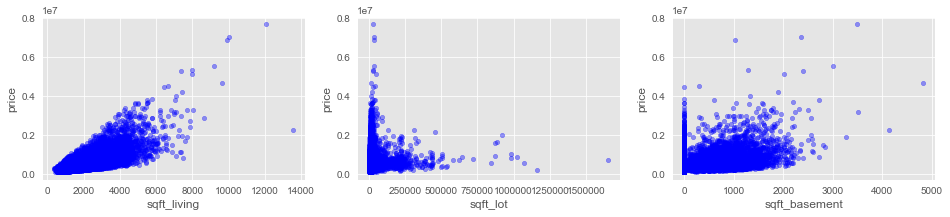

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'sqft_basement'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_numb = scaler.fit_transform(numbers2_df)
scaled_numbers_df = pd.DataFrame(norm_numb, columns=['bedrooms', 'bathrooms', 'floors', 'view', 'yr_built'])

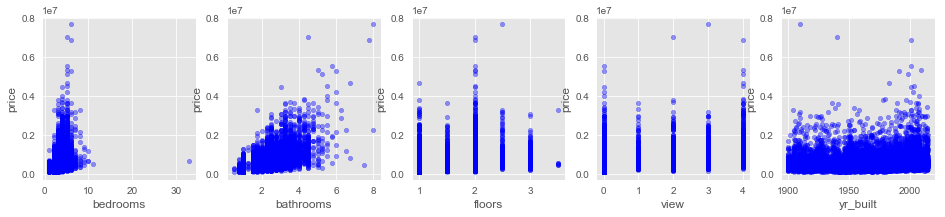

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors', 'view', 'yr_built'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

### 5.2 Categorical Variables


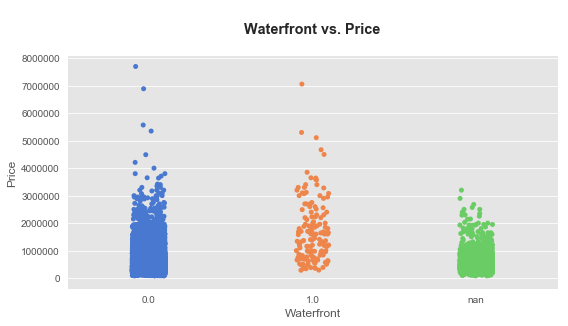

In [57]:
sns.catplot(x="waterfront", y="price", data=df, height=4, aspect=2)
plt.title('\nWaterfront vs. Price\n', fontweight='bold')
plt.xlabel('Waterfront')
plt.ylabel('Price');

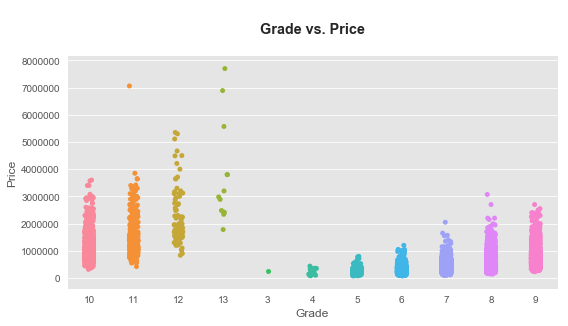

In [58]:
sns.catplot(x="grade", y="price", data=df, height=4, aspect=2)
plt.title('\nGrade vs. Price\n', fontweight='bold')
plt.xlabel('Grade')
plt.ylabel('Price');

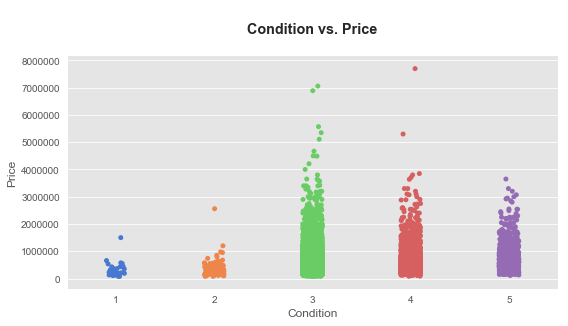

In [59]:
sns.catplot(x="condition", y="price", data=df, height=4, aspect=2)
plt.title('\nCondition vs. Price\n', fontweight='bold')
plt.xlabel('Condition')
plt.ylabel('Price');

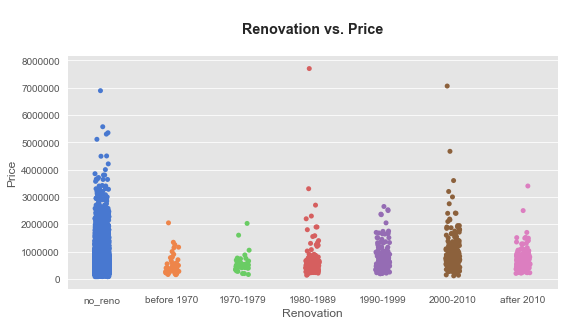

In [60]:
sns.catplot(x="reno_year", y="price", data=df, height=4, aspect=2)
plt.title('\nRenovation vs. Price\n', fontweight='bold')
plt.xlabel('Renovation')
plt.ylabel('Price');

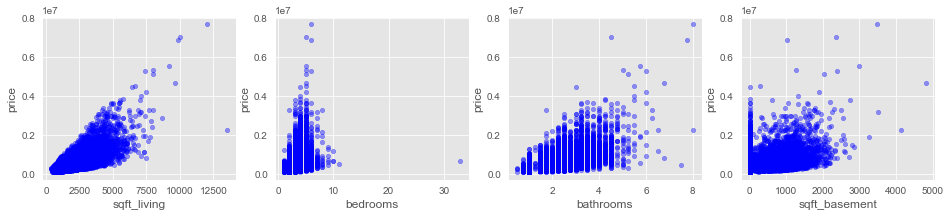

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'bedrooms', 'bathrooms', 'sqft_basement'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

**Create Dummy Variables**

In [62]:
df.waterfront = df.waterfront.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')

In [63]:
waterfront_dum = pd.get_dummies(df['waterfront'], prefix='wat_front', drop_first=True)
condition_dum = pd.get_dummies(df['condition'], prefix='condition_dum', drop_first=True)
grade_dum = pd.get_dummies(df['grade'], prefix='grade_dum', drop_first=True)
reno_year_dum = pd.get_dummies(df['reno_year'], prefix='reno_yr', drop_first=True)

In [64]:
df = df.drop(['waterfront', 'condition', 'grade', 'reno_year'], axis=1)

In [65]:
df = pd.concat([df, waterfront_dum, condition_dum, grade_dum, reno_year_dum], axis=1)

### 5.3 Regression Models

#### Continous Variables Only

In [66]:
df_cont = df[['sqft_living', 'sqft_lot', 'sqft_basement','bedrooms', 'bathrooms', 'floors', 'view', 'yr_built']]
df_cat = df[['wat_front_1.0', 'wat_front_nan',
       'condition_dum_2', 'condition_dum_3', 'condition_dum_4',
       'condition_dum_5', 'grade_dum_11', 'grade_dum_12', 'grade_dum_13',
       'grade_dum_3', 'grade_dum_4', 'grade_dum_5', 'grade_dum_6',
       'grade_dum_7', 'grade_dum_8', 'grade_dum_9', 'reno_yr_before 1970',
       'reno_yr_1970-1979', 'reno_yr_1980-1989', 'reno_yr_1990-1999',
       'reno_yr_2000-2010', 'reno_yr_after 2010']]

In [67]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [68]:
X = df_cont
y = df['price']
X = sm.add_constant(X)

model_cont = sm.OLS(y, X).fit()
prediction_cont = model_cont.predict(X)

model_cont.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     3784.
Date:                Mon, 07 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:02:52   Log-Likelihood:            -2.9793e+05
No. Observations:               21597   AIC:                         5.959e+05
Df Residuals:                   21588   BIC:                         5.959e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.976e+06   1.34e+05     44.527      0.000    5.71e+06    6.24e+06
sqft_living     286.1034      3.140     91.128      0.000     279.950     292.257
sqft_lot         -0.3606      0.040     -8.996      0.000      -0.439      -0.282
sqft_basement   -35.2279      4.784     -7.363      0.000     -44.606     -25.850
bedrooms      -5.855e+04   2199.951    -26.616      0.000   -6.29e+04   -5.42e+04
bathrooms      6.423e+04   3788.442     16.953      0.000    5.68e+04    7.17e+04
floors         4.552e+04   4039.148     11.270      0.000    3.76e+04    5.34e+04
view           8.544e+04   2268.282     37.668      0.000     8.1e+04    8.99e+04
yr_built      -3065.2038     69.580    -44.053      0.000   -3201.586   -2928.822
==============================================================================
Omnibus:                    13969.472   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           551213.375
Skew:                           2.556   Prob(JB):                         0.00
Kurtosis:                      27.216   Cond. No.                     3.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Categorical Predictors Only

In [69]:
X = df_cat
y = df['price']
X = sm.add_constant(X)

model_cat = sm.OLS(y, X).fit()
prediction_cat = model_cat.predict(X)

model_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     1381.
Date:                Mon, 07 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:02:52   Log-Likelihood:            -2.9790e+05
No. Observations:               21597   AIC:                         5.958e+05
Df Residuals:                   21574   BIC:                         5.960e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.066e+06   4.49e+04     23.746      0.000    9.78e+05    1.15e+06
wat_front_1.0        8.169e+05   1.99e+04     40.963      0.000    7.78e+05    8.56e+05
wat_front_nan        1186.7099   5154.165      0.230      0.818   -8915.834    1.13e+04
condition_dum_2     -4.236e+04   4.77e+04     -0.888      0.375   -1.36e+05    5.12e+04
condition_dum_3     -4.128e+04   4.44e+04     -0.931      0.352   -1.28e+05    4.57e+04
condition_dum_4      3.015e+04   4.44e+04      0.679      0.497   -5.69e+04    1.17e+05
condition_dum_5      1.298e+05   4.46e+04      2.907      0.004    4.23e+04    2.17e+05
grade_dum_11         4.121e+05   1.38e+04     29.870      0.000    3.85e+05    4.39e+05
grade_dum_12         1.062e+06   2.61e+04     40.652      0.000    1.01e+06    1.11e+06
grade_dum_13         2.641e+06   6.61e+04     39.965      0.000    2.51e+06    2.77e+06
grade_dum_3         -9.342e+05   2.37e+05     -3.941      0.000    -1.4e+06    -4.7e+05
grade_dum_4         -8.463e+05   4.63e+04    -18.298      0.000   -9.37e+05   -7.56e+05
grade_dum_5         -8.437e+05   1.69e+04    -49.814      0.000   -8.77e+05    -8.1e+05
grade_dum_6         -7.781e+05   8864.446    -87.775      0.000   -7.95e+05   -7.61e+05
grade_dum_7         -6.685e+05   7525.543    -88.833      0.000   -6.83e+05   -6.54e+05
grade_dum_8         -5.219e+05   7684.144    -67.919      0.000   -5.37e+05   -5.07e+05
grade_dum_9          -2.89e+05   8429.105    -34.284      0.000   -3.06e+05   -2.72e+05
reno_yr_before 1970  5.841e+04   3.46e+04      1.686      0.092   -9502.925    1.26e+05
reno_yr_1970-1979    6.826e+04   3.66e+04      1.865      0.062   -3469.640     1.4e+05
reno_yr_1980-1989     1.43e+05   2.14e+04      6.681      0.000    1.01e+05    1.85e+05
reno_yr_1990-1999    1.968e+05   1.99e+04      9.883      0.000    1.58e+05    2.36e+05
reno_yr_2000-2010    2.885e+05   1.58e+04     18.266      0.000    2.58e+05    3.19e+05
reno_yr_after 2010   2.191e+05   1.94e+04     11.271      0.000    1.81e+05    2.57e+05
==============================================================================
Omnibus:                    13238.233   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           473466.400
Skew:                           2.388   Prob(JB):                         0.00
Kurtosis:                      25.435   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5.4 Model Fit and Validation

In [70]:
# Regression for continuous and categorical predictors. 
predictors = df.drop(['price'], axis=1)
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 30 columns):
bedrooms               21597 non-null int64
bathrooms              21597 non-null float64
sqft_living            21597 non-null int64
sqft_lot               21597 non-null int64
floors                 21597 non-null float64
view                   21597 non-null int64
sqft_basement          21597 non-null int64
yr_built               21597 non-null int64
wat_front_1.0          21597 non-null uint8
wat_front_nan          21597 non-null uint8
condition_dum_2        21597 non-null uint8
condition_dum_3        21597 non-null uint8
condition_dum_4        21597 non-null uint8
condition_dum_5        21597 non-null uint8
grade_dum_11           21597 non-null uint8
grade_dum_12           21597 non-null uint8
grade_dum_13           21597 non-null uint8
grade_dum_3            21597 non-null uint8
grade_dum_4            21597 non-null uint8
grade_dum_5            21597 non-null uint8
grade_d

In [71]:
predictors = sm.add_constant(predictors)
model = sm.OLS(df['price'],predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1538.
Date:                Mon, 07 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:02:52   Log-Likelihood:            -2.9504e+05
No. Observations:               21597   AIC:                         5.901e+05
Df Residuals:                   21566   BIC:                         5.904e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.631e+06   1.39e+05     47.599      0.000    6.36e+06     6.9e+06
bedrooms            -2.448e+04   1995.388    -12.269      0.000   -2.84e+04   -2.06e+04
bathrooms            4.566e+04   3381.270     13.505      0.000     3.9e+04    5.23e+04
sqft_living           128.6388      3.541     36.331      0.000     121.699     135.579
sqft_lot               -0.2530      0.035     -7.188      0.000      -0.322      -0.184
floors               4.166e+04   3635.486     11.460      0.000    3.45e+04    4.88e+04
view                 4.259e+04   2149.678     19.812      0.000    3.84e+04    4.68e+04
sqft_basement          27.6605      4.333      6.384      0.000      19.167      36.154
yr_built            -3124.6946     68.918    -45.339      0.000   -3259.780   -2989.609
wat_front_1.0        5.926e+05   1.88e+04     31.598      0.000    5.56e+05    6.29e+05
wat_front_nan       -1814.4717   4516.962     -0.402      0.688   -1.07e+04    7039.108
condition_dum_2      6109.6286   4.18e+04      0.146      0.884   -7.59e+04    8.81e+04
condition_dum_3       3.08e+04   3.89e+04      0.792      0.428   -4.54e+04    1.07e+05
condition_dum_4      5.089e+04   3.89e+04      1.308      0.191   -2.54e+04    1.27e+05
condition_dum_5      9.106e+04   3.91e+04      2.327      0.020    1.44e+04    1.68e+05
grade_dum_11         2.738e+05   1.23e+04     22.201      0.000     2.5e+05    2.98e+05
grade_dum_12         7.514e+05   2.35e+04     31.931      0.000    7.05e+05    7.98e+05
grade_dum_13         1.945e+06    5.9e+04     32.987      0.000    1.83e+06    2.06e+06
grade_dum_3         -5.752e+05   2.08e+05     -2.768      0.006   -9.83e+05   -1.68e+05
grade_dum_4         -5.371e+05   4.12e+04    -13.022      0.000   -6.18e+05   -4.56e+05
grade_dum_5         -5.529e+05   1.65e+04    -33.598      0.000   -5.85e+05   -5.21e+05
grade_dum_6         -5.009e+05   1.02e+04    -49.095      0.000   -5.21e+05   -4.81e+05
grade_dum_7         -4.208e+05   8449.163    -49.804      0.000   -4.37e+05   -4.04e+05
grade_dum_8         -3.319e+05   7732.505    -42.924      0.000   -3.47e+05   -3.17e+05
grade_dum_9         -1.855e+05   7615.479    -24.357      0.000      -2e+05   -1.71e+05
reno_yr_before 1970 -7.774e+04   3.04e+04     -2.554      0.011   -1.37e+05   -1.81e+04
reno_yr_1970-1979    -7.39e+04   3.22e+04     -2.296      0.022   -1.37e+05   -1.08e+04
reno_yr_1980-1989   -7686.4525   1.89e+04     -0.406      0.684   -4.48e+04    2.94e+04
reno_yr_1990-1999    3.253e+04   1.77e+04      1.843      0.065   -2074.766    6.71e+04
reno_yr_2000-2010    1.192e+05   1.41e+04      8.443      0.000    9.15e+04    1.47e+05
reno_yr_after 2010   6.553e+04   1.73e+04      3.797      0.000    3.17e+04    9.94e+04
==============================================================================
Omnibus:    

### 5.5 Feature Selection 

In [72]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included### Feature Selection

In [73]:
result = stepwise_selection(predictors, df["price"], verbose = True)
print('resulting features:')
print(result)

Add  bedrooms                       with p-value 0.0
Add  view                           with p-value 0.0
Add  grade_dum_7                    with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  grade_dum_11                   with p-value 0.0
Add  grade_dum_12                   with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  const                          with p-value 0.0
Add  wat_front_1.0                  with p-value 1.24011e-163
Add  grade_dum_13                   with p-value 2.77586e-168
Add  grade_dum_6                    with p-value 4.52154e-126
Add  grade_dum_8                    with p-value 1.78972e-187
Add  grade_dum_5                    with p-value 1.52294e-149
Add  grade_dum_9                    with p-value 7.27109e-101
Add  grade_dum_4                    with p-value 1.34519e-40
Add  floors                         with p-value 6.98441e-20
Add  condition_dum_5         

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = predictors
y = df['price']

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 20)
selector = selector.fit(predictors, df["price"])

In [75]:
selector.support_
selector.ranking_
estimators = selector.estimator_

print('\n Coefficients:')
print(estimators.coef_)
print('\n Intercept:')
print(estimators.intercept_)


 Coefficients:
[  72692.06161082   69393.66426286  591704.03681772   72401.97325186
  156401.72337255  355236.4632905   942908.43593081 2411952.66566094
 -718207.77658142 -660342.55881685 -670163.70420765 -614531.38517045
 -549350.80952905 -450021.44625644 -252232.36680227   37195.26169538
   64697.77092158  158519.70625296  257783.2848693   191180.29168303]

 Intercept:
769287.0070007374


In [76]:
new_columns = X.columns[selector.support_]
linreg.fit(X[new_columns], y);

In [77]:
print('\nSelected Predictors:')
print(new_columns)


Selected Predictors:
Index(['bathrooms', 'view', 'wat_front_1.0', 'condition_dum_4',
       'condition_dum_5', 'grade_dum_11', 'grade_dum_12', 'grade_dum_13',
       'grade_dum_3', 'grade_dum_4', 'grade_dum_5', 'grade_dum_6',
       'grade_dum_7', 'grade_dum_8', 'grade_dum_9', 'reno_yr_before 1970',
       'reno_yr_1970-1979', 'reno_yr_1990-1999', 'reno_yr_2000-2010',
       'reno_yr_after 2010'],
      dtype='object')


In [78]:
y_hat = linreg.predict(X[new_columns])

In [79]:
SSR = np.sum((y - y_hat)**2)
SST = np.sum((y - np.mean(y))**2)
Rsq = 1 - (float(SSR)) / SST
Rsq_adj = 1 - (1 - Rsq)*(len(y)-1)/(len(y) - X[new_columns].shape[1] - 1)

In [80]:
print('SSR:', SSR)
print('\nSST:', SST)
print('\nRsq:', Rsq)
print('\nRsq Adj:', Rsq_adj)

SSR: 1125468151732955.0

SST: 2914582130408202.5

Rsq: 0.6138492238764508

Rsq Adj: 0.6134912791451534


### 5.6 Train/Test Data

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
test_col = ['grade_dum_11', 'grade_dum_7', 'grade_dum_6', 'wat_front_1.0', 'sqft_living', 'yr_built', 'grade_dum_12', 'grade_dum_13', 'grade_dum_8', 'grade_dum_5', 'grade_dum_9', 'view', 'bathrooms', 'grade_dum_4', 'bedrooms', 'floors', 'condition_dum_5', 'reno_yr_2000-2010', 'sqft_lot', 'sqft_basement', 'condition_dum_4', 'reno_yr_after 2010', 'grade_dum_3']
X = df[test_col]
y = df.price

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(17277, 23) (17277,)
(4320, 23) (4320,)


In [84]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [85]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [86]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 42407394174.74578
Test Mean Squarred Error: 45738438895.79508


In [87]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Estimated R²:")
print(linreg.score(X,y))

pd.DataFrame(list(zip(test_col, linreg.coef_)), columns=['Features', 'Coefficient'])

Estimated R²:
0.6808247070887552


,Features,Coefficient
0,grade_dum_11,2.806673e+05
1,grade_dum_7,-4.244754e+05
2,grade_dum_6,-5.060965e+05
3,wat_front_1.0,5.806139e+05
4,sqft_living,1.257897e+02
5,yr_built,-3.140107e+03
6,grade_dum_12,7.618068e+05
7,grade_dum_13,2.180497e+06
8,grade_dum_8,-3.350186e+05
9,grade_dum_5,-5.534949e+05


In [88]:
from sklearn import linear_model

In [89]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [90]:
print ('Test Data - R2 Score:', model.score(X_test, y_test))  
print ('Train Data - R2 Score:', model.score(X_train, y_train)) 

Test Data - R2 Score: 0.6487502265003879
Train Data - R2 Score: 0.688478798111743


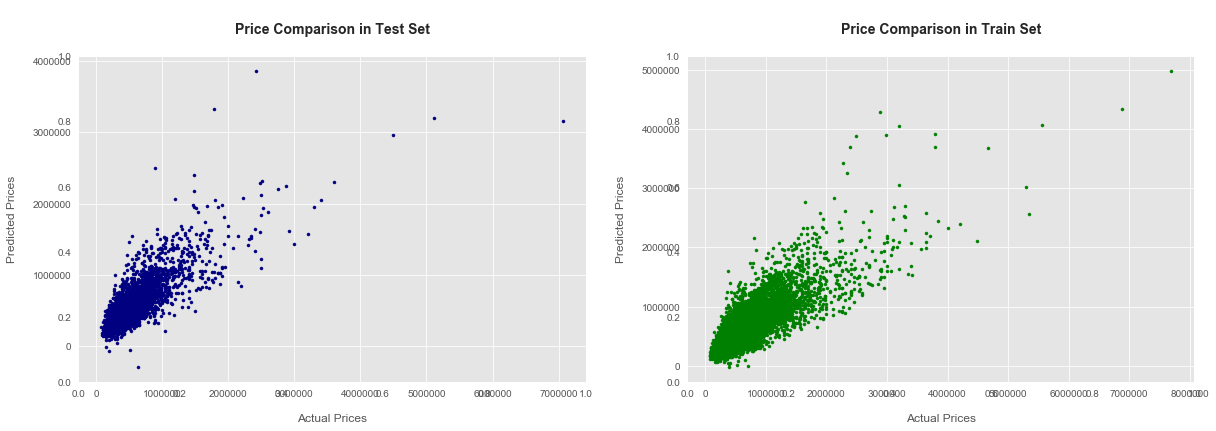

In [91]:
y_pred_test = lm.predict(X_test)

fig, ax = plt.subplots(1,2, figsize=(20, 6))

# Test Data vs Actual Data
ax1 = fig.add_subplot(121)
ax1.scatter(y_test, y_pred_test, marker='.', c='navy')
ax1.set_xlabel("\nActual Prices")
ax1.set_ylabel("Predicted Prices\n")
ax1.set_title("\nPrice Comparison in Test Set\n", size=14, weight='bold')

y_pred_train = lm.predict(X_train)

# Train Data vs Actual Data
ax2 = fig.add_subplot(122)
ax2.scatter(y_train, y_pred_train, marker='.', c='green')
ax2.set_xlabel("\nActual Prices")
ax2.set_ylabel("Predicted Prices\n")
ax2.set_title("\nPrice Comparison in Train Set\n", size=14, weight='bold');

### 5.7 K-Fold Cross Validation 

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

cv_5_results = np.mean(cross_val_score(model, X, y, cv=5, scoring="r2"))
cv_10_results = np.mean(cross_val_score(model, X, y, cv=10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(model, X, y, cv=20, scoring="r2"))

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

0.6740180283918752
0.6729368083320784
0.6732857240015014


In [93]:
mse_5_results = np.mean(cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error"))
mse_10_results = np.mean(cross_val_score(model, X, y, cv=10, scoring="neg_mean_squared_error"))
mse_20_results = np.mean(cross_val_score(model, X, y, cv=20, scoring="neg_mean_squared_error"))

print(mse_5_results)
print(mse_10_results)
print(mse_20_results)

-43895274827.627975
-43858857204.564445
-43708854434.477715


<a id="006"></a>

## 6) Interpreting Data
***

### Revisiting Initial Questions:
> 1) Does location affect the sale price of houses in Kings County?
<br> 2) Does time of year affect the sale price of houses in Kings County?
<br> 3) What feature(s) most significantly affect the sale prices of houses in Kings County?
<br>

1) **Location** clearly affects the price of houses, most noticeably the increased prices of houses on the **waterfront**. This can be seen in the previous [map of Kings County](#Map)

2) The best time to sell a house in Kings County is in the **late Spring time to early Summer** months - March, April, May, June.

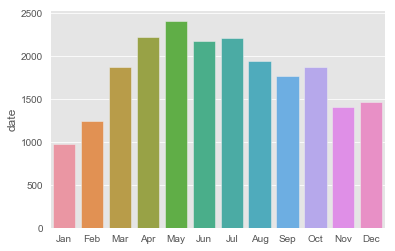

In [94]:
sns.barplot(x=calendar_list, y=df_date_graph);

3) The **Grade** of a house significantly affects the sale price. The higher grade houses (12/13) average nearly $1 million higher than lower grade houses. Other features that noticeably affect the price of a house include **renovation status**, **square footage of living area**, and the presence of **basements** or additional **bedrooms**. 